In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
from sklearn.model_selection import train_test_split                   
from sklearn import svm
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor                       
import xgboost
from xgboost import XGBRegressor                                        
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/19cse304-fods-ml-evaluation/Submission.csv
/kaggle/input/19cse304-fods-ml-evaluation/train.csv
/kaggle/input/19cse304-fods-ml-evaluation/test.csv


In [ ]:
train = pd.read_csv('/kaggle/input/19cse304-fods-ml-evaluation/train.csv')
test = pd.read_csv('/kaggle/input/19cse304-fods-ml-evaluation/test.csv')

In [ ]:
print(train.head())

   record_ID      week  store_id  sku_id  total_price  base_price  \
0          1  17/01/11      8091  216418      99.0375    111.8625   
1          2  17/01/11      8091  216419      99.0375     99.0375   
2          3  17/01/11      8091  216425     133.9500    133.9500   
3          4  17/01/11      8091  216233     133.9500    133.9500   
4          9  17/01/11      8091  219009     227.2875    227.2875   

   is_featured_sku  is_display_sku  units_sold  
0                0               0          20  
1                0               0          28  
2                0               0          19  
3                0               0          44  
4                0               0          18  


In [ ]:
print(test.head())

   record_ID      week  store_id  sku_id  total_price  base_price  \
0     192751  16/04/13      9845  300021     109.7250    109.7250   
1      94214  20/02/12      9532  300021      86.2125     86.2125   
2     201221  28/05/13      8094  217217     229.4250    229.4250   
3      38612  27/06/11      9490  223245     210.9000    213.0375   
4      83833  9/1/2012      9043  219029     327.0375    327.0375   

   is_featured_sku  is_display_sku  
0                0               0  
1                0               1  
2                0               0  
3                0               1  
4                0               0  


In [ ]:
print("Training data shape: ",train.shape)
print("Test data shape: ",test.shape)

Training data shape:  (120150, 9)
Test data shape:  (30000, 8)


In [ ]:
train_original=train.copy() 
test_original=test.copy()

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120150 entries, 0 to 120149
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   record_ID        120150 non-null  int64  
 1   week             120150 non-null  object 
 2   store_id         120150 non-null  int64  
 3   sku_id           120150 non-null  int64  
 4   total_price      120150 non-null  float64
 5   base_price       120150 non-null  float64
 6   is_featured_sku  120150 non-null  int64  
 7   is_display_sku   120150 non-null  int64  
 8   units_sold       120150 non-null  int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 8.3+ MB


In [ ]:
train.dtypes.value_counts()

int64      6
float64    2
object     1
dtype: int64

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   record_ID        30000 non-null  int64  
 1   week             30000 non-null  object 
 2   store_id         30000 non-null  int64  
 3   sku_id           30000 non-null  int64  
 4   total_price      29999 non-null  float64
 5   base_price       30000 non-null  float64
 6   is_featured_sku  30000 non-null  int64  
 7   is_display_sku   30000 non-null  int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 1.8+ MB


In [ ]:
test.dtypes.value_counts()

int64      5
float64    2
object     1
dtype: int64

In [ ]:
print("Train count:\n",train.count())
print("\nTest count:\n",test.count())

Train count:
 record_ID          120150
week               120150
store_id           120150
sku_id             120150
total_price        120150
base_price         120150
is_featured_sku    120150
is_display_sku     120150
units_sold         120150
dtype: int64

Test count:
 record_ID          30000
week               30000
store_id           30000
sku_id             30000
total_price        29999
base_price         30000
is_featured_sku    30000
is_display_sku     30000
dtype: int64


In [ ]:
train.isnull().sum()

record_ID          0
week               0
store_id           0
sku_id             0
total_price        0
base_price         0
is_featured_sku    0
is_display_sku     0
units_sold         0
dtype: int64

In [ ]:
test.isnull().sum()

record_ID          0
week               0
store_id           0
sku_id             0
total_price        1
base_price         0
is_featured_sku    0
is_display_sku     0
dtype: int64

<AxesSubplot:title={'center':'Correlation of Numeric Features with Sale Price'}>

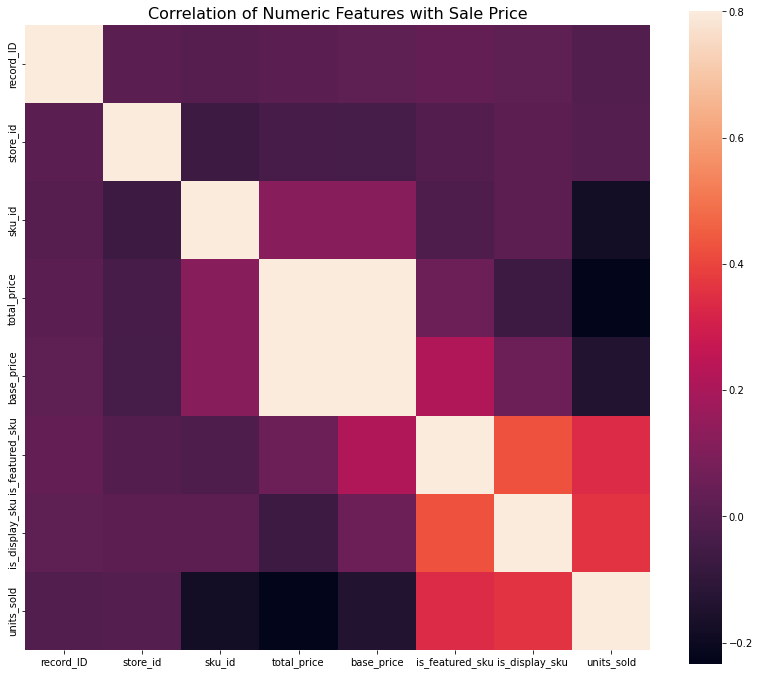

In [ ]:
plt.figure(figsize = (14,12))
plt.title('Correlation of Numeric Features with Sale Price', y=1, size=16)
sns.heatmap(train.corr(), square = True, vmax=0.8)

In [ ]:
train.describe()

,record_ID,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold
count,120150.000000,120150.000000,120150.000000,120150.000000,120150.000000,120150.000000,120150.000000,120150.000000
mean,106356.242072,9200.680108,254646.000574,206.620108,219.395313,0.095098,0.133267,51.679534
std,61430.743017,615.091588,85304.080816,103.306218,110.927286,0.293351,0.339864,60.718735
min,1.000000,8023.000000,216233.000000,41.325000,61.275000,0.000000,0.000000,1.000000
25%,53140.250000,8562.000000,217217.000000,130.387500,133.237500,0.000000,0.000000,20.000000
50%,106366.500000,9371.000000,222087.000000,198.075000,205.912500,0.000000,0.000000,35.000000
75%,159709.750000,9731.000000,245338.000000,233.700000,234.412500,0.000000,0.000000,62.000000
max,212644.000000,9984.000000,679023.000000,562.162500,562.162500,1.000000,1.000000,2876.000000


In [ ]:
train['total_price'] = train['total_price'].fillna(train['total_price'].mean())

In [ ]:
test['total_price'] = test['total_price'].fillna(test['total_price'].mean()) 

In [ ]:
train.head()

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold
0,1,17/01/11,8091,216418,99.0375,111.8625,0,0,20
1,2,17/01/11,8091,216419,99.0375,99.0375,0,0,28
2,3,17/01/11,8091,216425,133.9500,133.9500,0,0,19
3,4,17/01/11,8091,216233,133.9500,133.9500,0,0,44
4,9,17/01/11,8091,219009,227.2875,227.2875,0,0,18


In [ ]:
train.drop(columns=['record_ID','week'], inplace=True, axis=1)

In [ ]:
test.head()

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku
0,192751,16/04/13,9845,300021,109.7250,109.7250,0,0
1,94214,20/02/12,9532,300021,86.2125,86.2125,0,1
2,201221,28/05/13,8094,217217,229.4250,229.4250,0,0
3,38612,27/06/11,9490,223245,210.9000,213.0375,0,1
4,83833,9/1/2012,9043,219029,327.0375,327.0375,0,0


In [ ]:
test.drop(columns=['record_ID','week'], inplace=True, axis=1)

In [ ]:
print(train.head())

   store_id  sku_id  total_price  base_price  is_featured_sku  is_display_sku  \
0      8091  216418      99.0375    111.8625                0               0   
1      8091  216419      99.0375     99.0375                0               0   
2      8091  216425     133.9500    133.9500                0               0   
3      8091  216233     133.9500    133.9500                0               0   
4      8091  219009     227.2875    227.2875                0               0   

   units_sold  
0          20  
1          28  
2          19  
3          44  
4          18  


In [ ]:
print(test.head())

   store_id  sku_id  total_price  base_price  is_featured_sku  is_display_sku
0      9845  300021     109.7250    109.7250                0               0
1      9532  300021      86.2125     86.2125                0               1
2      8094  217217     229.4250    229.4250                0               0
3      9490  223245     210.9000    213.0375                0               1
4      9043  219029     327.0375    327.0375                0               0


In [ ]:
X = train.iloc[:,:-1]  
y = train['units_sold']   

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=4)

In [ ]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(96120, 6) (24030, 6) (96120,) (24030,)


In [ ]:
sc = StandardScaler()
X_train_Scaled = sc.fit_transform(X_train)
X_test_Scaled = sc.transform(X_test)

In [ ]:
rf = RandomForestRegressor()
rf.fit(X_train_Scaled, y_train)

RandomForestRegressor()

In [ ]:
y_pred = rf.predict(X_test_Scaled)

In [ ]:
print("Train Score {:.2f} & Test Score {:.2f}".format(rf.score(X_train_Scaled, y_train),rf.score(X_test_Scaled, y_test)))

Train Score 0.93 & Test Score 0.73


In [ ]:
y_pred_test = rf.predict(test)

In [ ]:
y_pred_test.shape

(30000,)

In [ ]:
submission = pd.DataFrame({'record_ID': test_original['record_ID'], 'units_sold': y_pred_test})
submission.to_csv('Submission.csv', index=False)